In [8]:
%matplotlib inline
# %run /Users/ansantam/cernbox/tune_scans/Toolbox/myToolbox.py
# %run /Users/ansantam/cernboxtune_scans/Toolbox/Tune_diagram.py
import collections
import glob
import h5py
import itertools
import os
import re
import warnings
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib import rc

In [12]:
def plot_tune_lines(order):
#     orders = list(np.arange(1, order + 1))
    orders = list(np.array(np.linspace(order + 1, 1, order + 1), dtype=int))
    styl_list = ['', '-', '-.', '--', ':', '', '-', '-.', '--', ':']
    color_list = ['red', 'blue', 'green', 'purple', 'orange']
    # dipolar, quadrupolar, sextupolar, octupolar, decapolar
#     color_list = ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']
    span = np.arange(-1, 1, 0.01)

   
    for ord in orders:
        integers = list(np.arange(-(ord), ord + 1))
        pairs_of_integers = list(itertools.product(integers, repeat=3))
        for pair in pairs_of_integers:
            mx = pair[0]
            my = pair[1]
            intt = pair[2]
            if abs(mx) + abs(my) <= order and my != 0:
                y = (intt/my) - (mx/my)*span
                x = span
                if my % 2 == 0:
                    plt.plot(x + 4, y + 4, color=color_list[abs(mx) + abs(my) - 1], ls="-", linewidth=0.5)
                else:
                    plt.plot(x + 4, y + 4, color=color_list[abs(mx) + abs(my) - 1], ls="--", linewidth=0.5)
            elif abs(mx) <= order and mx != 0 and my == 0:
                x = np.empty(len(span))
                x.fill(intt/mx)
                y = span
                if my % 2 == 0:
                    plt.plot(x + 4, y + 4, color_list[abs(mx) + abs(my) - 1], ls="-", linewidth=0.5)
                else:
                    plt.plot(x + 4, y + 4, color_list[abs(mx) + abs(my) - 1], ls="--", linewidth=0.5)
            elif abs(my) <= order and my != 0 and mx == 0:
                y = np.empty(len(span))
                y.fill(intt/my)
                if my % 2 == 0:
                    plt.plot(x + 4, y + 4, color_list[abs(mx) + abs(my) - 1], ls="-", linewidth=0.5)
                else:
                    plt.plot(x + 4, y + 4, color_list[abs(mx) + abs(my) - 1], ls="--", linewidth=0.5)


In [3]:
def plot_necktie(ax, Q0, dQ):
    radius = 0.5 * np.sqrt(dQ[0]**2 + dQ[1]**2)
    angle  = np.arctan(dQ[1]/dQ[0])
    angle_offset = 18 * np.pi / 180

    Qx = Q0[0]-dQ[0]
    Qy = Q0[1]-dQ[1]
    poly = ([Qx, Qy], [Qx+radius*np.cos(angle-angle_offset), Qy+radius*np.sin(angle-angle_offset)],
            [Q0[0], Q0[1]], [Qx+radius*np.cos(angle+angle_offset), Qy+radius*np.sin(angle+angle_offset)])

#     ax.plot(Q0[0], Q0[1], '*', color = 'k', ms=13)
    patch = PatchCollection([Polygon(poly, True)], color="gray", alpha=0.3)
    spread = ax.add_collection(patch)

In [4]:
# Specify the folder where the data is with respect to the location of this notebook
folder = "tunes_R1"
data_path = os.path.join(os.getcwd(), folder)
# result_folders = os.listdir(data_path)
result_folders = [x[0].strip(data_path) for x in os.walk(data_path)][1:]

print(result_folders)

['TUNES_R1_2018_10_31_14_52', 'TUNES_R1_2018_10_31_14_54']


[]
[275. 285.]
[275. 285.]
[275. 285.]
[275. 285.]
[275. 285.]
[275. 285.]
[275. 285.]
[275. 285.]
[275. 285.]


<Figure size 432x288 with 0 Axes>

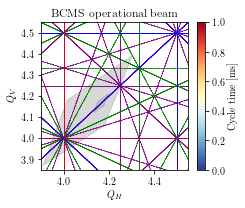

<Figure size 432x288 with 0 Axes>

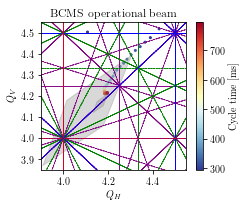

<Figure size 432x288 with 0 Axes>

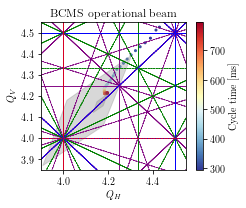

<Figure size 432x288 with 0 Axes>

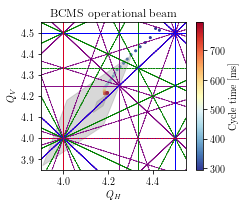

<Figure size 432x288 with 0 Axes>

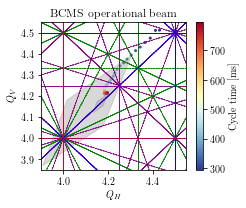

<Figure size 432x288 with 0 Axes>

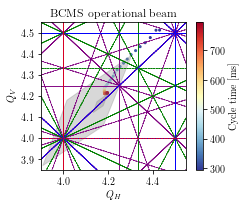

<Figure size 432x288 with 0 Axes>

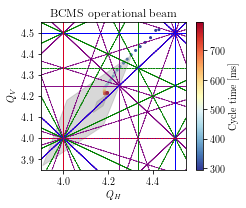

<Figure size 432x288 with 0 Axes>

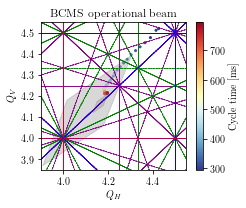

<Figure size 432x288 with 0 Axes>

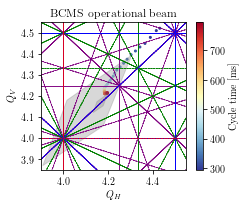

<Figure size 432x288 with 0 Axes>

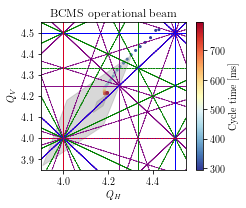

In [25]:
for directory in result_folders:
#     plane = re.search('TUNE_(.*)_2018', directory).group(1).replace("_", " ")
#     beam = re.search('(.*)_TUNE', directory).group(1)
    bct_files = glob.glob(os.path.join(data_path, directory, "bct_shot*"))
    bbq_files = glob.glob(os.path.join(data_path, directory, "bbq_shot*"))
    sampler_files = glob.glob(os.path.join(data_path, directory, "sampler_shot*"))
    current_files = glob.glob(os.path.join(data_path, directory, "currents_shot*"))
    
    bct_dict = collections.defaultdict(list)
    bbq_dict = collections.defaultdict(list)
    sampler_dict = collections.defaultdict(list)
    current_dict = collections.defaultdict(list)
    
    shots_bct = []
    shots_bbq = []
    shots_sampler = []
    shots_current = []
    
    for fb in bct_files:
        data_bct = h5py.File(fb, 'r')
        shot_bct = re.search('shot_(.*)_R', fb).group(1)
        shots_bct.append(shot_bct)
        bct_dict[(str(shot_bct), "x")] = np.asarray(list(data_bct["ctime"]))
        bct_dict[(str(shot_bct), "y")] = np.asarray(list(data_bct["intensity"]))
        
    for fw in bbq_files:
        data_bbq = h5py.File(fw, 'r')
        shot_bbq = re.search('shot_(.*)_R', fw).group(1)
        shots_bbq.append(shot_bbq)
        bbq_dict[(str(shot_bbq), "xh")] = np.asarray(list(data_bbq["ctimeH"]))
        bbq_dict[(str(shot_bbq), "yh")] = np.asarray(list(data_bbq["bbqH"])) + 4
        bbq_dict[(str(shot_bbq), "xv")] = np.asarray(list(data_bbq["ctimeV"]))
        bbq_dict[(str(shot_bbq), "yv")] = np.asarray(list(data_bbq["bbqV"])) + 4
        
    for fs in sampler_files:
        data_sampler = h5py.File(fs, 'r')
        shot_sampler = re.search('shot_(.*)_R', fs).group(1)
        shots_sampler.append(shot_sampler)
        sampler_dict[(str(shot_sampler), "xh")] = np.asarray(list(data_sampler["ctimeH"]))
        sampler_dict[(str(shot_sampler), "yh")] = np.asarray(list(data_sampler["samplerH"]))
        sampler_dict[(str(shot_sampler), "xv")] = np.asarray(list(data_sampler["ctimeV"]))
        sampler_dict[(str(shot_sampler), "yv")] = np.asarray(list(data_sampler["samplerV"]))
        
    for fc in current_files:
        data_current = h5py.File(fc, 'r')
        shot_current = re.search('shot_(.*)_R', fc).group(1)
        shots_current.append(shot_current)
        current_dict[(str(shot_current), "qfo")] = np.asarray(list(data_current["qfo"]))
        current_dict[(str(shot_current), "qde")] = np.asarray(list(data_current["qde"]))
        current_dict[(str(shot_current), "mps")] = np.asarray(list(data_current["mps"]))
        current_dict[(str(shot_current), "bdl")] = np.asarray(list(data_current["bdl"]))
        current_dict[(str(shot_current), "qcf")] = np.asarray(list(data_current["qcf"]))
        current_dict[(str(shot_current), "qcd")] = np.asarray(list(data_current["qcd"]))
        current_dict[(str(shot_current), "ctime")] = np.asarray(list(data_current["ctime"]))

    shot_list = list(set(shots_bct) & set(shots_bbq) & set(shots_sampler) & set(shots_current))

    for shot in shot_list:
        fig = plt.figure()
# #         fig, ax1, ax2, ax3, ax4, ax5, ax6 = plt.subplots(2, 3)
#         plt.rcParams["figure.figsize"] = [10, 6]
    
#         ax1 = fig.add_subplot(331)
#         ax1.scatter(bct_dict[(shot, "x")], bct_dict[(shot, "y")], s=0.3)
#         ax1.set_xlim([200, 900])
#         ax1.set_xlabel('ctime [ms]')
#         ax1.set_ylabel(r'Intensity [$10^{10}$]')
        
#         ax2 = fig.add_subplot(332)
#         ax2.scatter(bbq_dict[(shot, "xh")], bbq_dict[(shot, "yh")], s=0.5, label="Horizontal")
#         ax2.scatter(bbq_dict[(shot, "xv")], bbq_dict[(shot, "yv")], s=0.5, label="Vertical")
#         ax2.set_xlim([200, 900])
# #         ax2.set_ylim([4.15, 4.6])
#         ax2.set_xlabel('ctime [ms]')
#         ax2.set_ylabel(r'Tune (BBQ)')
#         ax2.legend()
# #         ax2.set_title(beam + " " + plane + ", shot " + shot, fontsize=25)
        
#         ax3 = fig.add_subplot(111)
#         ax3.scatter(sampler_dict[(shot, "xh")], sampler_dict[(shot, "yh")], s=0.3, label="Horizontal")
#         ax3.scatter(sampler_dict[(shot, "xv")], sampler_dict[(shot, "yv")], s=0.3, label="Vertical")
#         ax3.scatter(bbq_dict[(shot, "xh")], bbq_dict[(shot, "yh")], s=2, color="black")
#         ax3.scatter(bbq_dict[(shot, "xv")], bbq_dict[(shot, "yv")], s=2, color="black")
#         ax3.set_xlim([200, 900])
# #         ax3.set_ylim([4.15, 4.6])
#         ax3.set_xlabel('ctime [ms]')
#         ax3.set_ylabel(r'Tune (sampler)')
#         ax3.legend()
        
#         ax4 = fig.add_subplot(334)
#         ax4.scatter(current_dict[(shot, "ctime")], current_dict[(shot, "qfo")], s=0.3, label="QFO")
#         ax4.set_xlim([200, 900])
#         ax4.set_xlabel('ctime [ms]')
#         ax4.set_ylabel(r'Current [A]')
#         ax4.legend()
        
#         ax5 = fig.add_subplot(335)
#         ax5.scatter(current_dict[(shot, "ctime")], current_dict[(shot, "qde")], s=0.3, label="QDE")
#         ax5.set_xlim([200, 900])
#         ax5.set_xlabel('ctime [ms]')
#         ax5.set_ylabel(r'Current [A]')
#         ax5.legend()
        
#         ax6 = fig.add_subplot(336)
#         ax6.scatter(current_dict[(shot, "ctime")], current_dict[(shot, "mps")], s=0.3, label="MPS")
#         ax6.set_xlim([200, 900])
#         ax6.set_xlabel('ctime [ms]')
#         ax6.set_ylabel(r'Current [A]')
#         ax6.legend()
        
#         ax7 = fig.add_subplot(337)
#         ax7.scatter(current_dict[(shot, "ctime")], current_dict[(shot, "bdl")], s=0.3, label="BDL")
#         ax7.set_xlim([200, 900])
#         ax7.set_xlabel('ctime [ms]')
#         ax7.set_ylabel(r'Current [A]')
#         ax7.legend()
        
#         ax8 = fig.add_subplot(338)
#         ax8.scatter(current_dict[(shot, "ctime")], current_dict[(shot, "qcf")], s=0.3, label="QCF")
#         ax8.set_xlim([200, 900])
#         ax8.set_xlabel('ctime [ms]')
#         ax8.set_ylabel(r'Current [A]')
#         ax8.legend()
        
#         ax9 = fig.add_subplot(339)
#         ax9.scatter(current_dict[(shot, "ctime")], current_dict[(shot, "qcd")], s=0.3, label="QCD")
#         ax9.set_xlim([200, 900])
#         ax9.set_xlabel('ctime [ms]')
#         ax9.set_ylabel(r'Current [A]')
#         ax9.legend()
             
#         plt.tight_layout()
# #         plt.show()
#         plt.savefig(directory + '_shot_' + str(shot) + '.png', dpi=1000)
#         plt.clf()
#         plt.cla()

        old_y = np.asarray(bbq_dict[(shot, "yv")][0:2])
        new_y = 4.5 + (4.5 - old_y)
    
        print(bbq_dict[(shot, "xh")][0:2])
#         plt.rcParams["figure.figsize"] = [3.5, 3]
        f, ax = plt.subplots(1, figsize = (3.5, 3))
        rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
        rc('text', usetex=True)
#         ax10 = fig.add_subplot(111)
        plot_tune_lines(4)
        sc = ax.scatter(bbq_dict[(shot, "yh")][2:], bbq_dict[(shot, "yv")][2:], c=bbq_dict[(shot, "xh")][2:], s=4, cmap=cm)
        ax.scatter(bbq_dict[(shot, "yh")][0:2], new_y, c=bbq_dict[(shot, "xh")][0:2], s=4, cmap=cm, vmin=-5, vmax=-5)
        cbar = plt.colorbar(sc)
        cbar.ax.set_ylabel('Cycle time [ms]')
#         cbar.set_xlim([200, 900])
# #         ax3.set_ylim([4.15, 4.6])
        dQinj=(0.3965455184576948, 0.5240862919506065)
        dQextr=(0.06485957107663054, 0.0881864896737638)
        plot_necktie(ax, [4.302974, 4.396569], dQinj)
        plot_necktie(ax, [4.19598, 4.212508], dQextr)
        ax.set_title("BCMS operational beam")
        ax.set_xlim([3.9, 4.55])
        ax.set_ylim([3.85, 4.55])
#         ax.set_xlim([4, 4.55])
#         ax.set_ylim([4, 4.55])
        ax.set_xlabel(r'$Q_H$')
        ax.set_ylabel(r'$Q_V$')
#         ax10.legend()
        f.tight_layout()
        plt.savefig(directory + '_tune_diagram_' + str(shot) + '.png', dpi=1000)
#         plt.savefig(directory + '_single_shot_' + str(shot) + '.pdf')